In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


1) DBSCAN Algorithm

1a) How many clusters are formed? Draw the outline of your clusters. Explain your reasoning

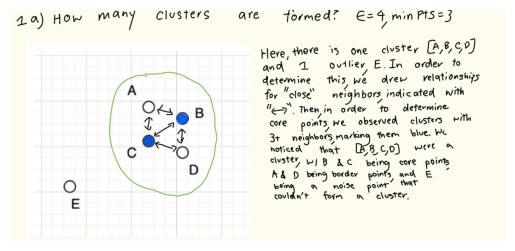

In [8]:
q1a = mpimg.imread("1a.png")
plt.imshow(q1a)
plt.axis('off')
plt.show()

1b) With respect to the above figure, state one advantage of DBSCAN over k-means algorithm

One specific thing in regards to this figure is that DBSCAN will separate the cluster of [A, B, C, D] and the outlier point E, while k-means might not. K-means might even force point E into the larger cluster, which could create a centroid that doesn't accurately represent the cluster of [A, B, C, D] that DBSCAN does. 

2) Association Rule Mining: Consider the following table:
   
| ID  | Movies Watched |
|----|----------------------------------------------------------------|
| 1  | Titanic, A Star is Born, Crazy Rich Asians                    |
| 2  | Titanic, Inception, Crazy Rich Asians                         |
| 3  | Titanic, Crazy Rich Asians, Avatar, Iron Man                  |
| 4  | A Star is Born, Inception, Crazy Rich Asians, Avengers        |
| 5  | A Star is Born, Inception, Crazy Rich Asians, Avatar, Avengers |


2a) Find all frequent patterns (i.e. movie combinations whose support $\ge$ 0.5.)

| Movie  | Individual Support |
|-------|-------------------|
| Titanic | 0.6 |
| A Star is Born | 0.6 |
| Crazy Rich Asians | 1.0 |
| Inception | 0.6 |
| Avatar | 0.4 |
| Iron Man | 0.2 |
| Avengers | 0.4 |

Individual movies that have a support above 0.5 include Titanic, A Star is Born, Crazy Rich Asians, and Inception. In order to calculate future pairs, triples, and more, we will continuously only use patterns that already have a support $\ge$ 0.5, due to the nature of probabilities.

| Movie Pair | Support |
|------------|---------|
| Titanic, A Star is Born | 0.2 |
| Titanic, Crazy Rich Asians | 0.6 |
| Titanic, Inception | 0.2 |
| A Star is Born, Crazy Rich Asians | 0.6 |
| A Star is Born, Inception | 0.4 |
| Crazy Rich Asians, Inception | 0.6 |


Pair Supports $\ge$ 0.5 include (Titanic, Crazy Rich Asians), (A Star is Born, Crazy Rich Asians), and (Crazy Rich Asians, Inception). There are no 3-movie, 4-movie, nor 5-movie combinations that have a support $\ge$ 0.5


2b) Find all rules ($X \longrightarrow Y$) ($s$, $c$) where $s$ represents support and $c$ represents confidence such that $s \ge 0.5$, $c \ge 0.6$. 

| Movie Pair | Support | Confidence |
|------------|---------|-----------|
| Titanic, A Star is Born | 0.2 | 0.33 |
| A Star is Born, Titanic | 0.2 | 0.33 |
| Titanic, Crazy Rich Asians | 0.6 | 1.0 |
| Crazy Rich Asians, Titanic | 0.6 | 0.6 |
| Titanic, Inception | 0.2 | 0.33 |
| Inception, Titanic | 0.2 | 0.33 |
| A Star is Born, Crazy Rich Asians | 0.6 | 1.0 |
| Crazy Rich Asians, A Star is Born | 0.6 | 0.6 |
| A Star is Born, Inception | 0.4 | 0.66 |
| Inception, A Star is Born | 0.4 | 0.66 |
| Crazy Rich Asians, Inception | 0.6 | 0.6 |
| Inception, Crazy Rich Asians | 0.6 | 1.0 |

Using this table, the rules that that have a support $\ge$ 0.5 and confidence $\ge$ 0.6 are (Titanic -> Crazy Rich Asians), (Crazy Rich Asians, Titaic), (A Star is Born, Crazy Rich Asians), (Crazy Rich Asians, A Star is Born), (Crazy Rich Asians, Inception), (Inception, Crazy Rich Asians)

3) PCA: Consider the following two plots. These are plots of training data point $X$ in $R^2$ belonging to 2 classes.

3a) Draw all two principal components in the picture. You are expected to draw the rough directions of the principal components instead of accurate computations.

Here, blue represents the main principal component, while red represents the second principal component (the one orthogonal to the main component)

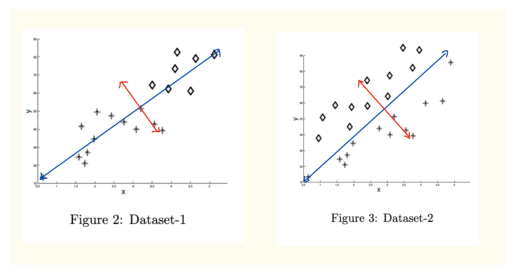

In [12]:
q3a = mpimg.imread("3a.png")
plt.imshow(q3a)
plt.axis("off")
plt.show()

3b) After projecting all the points onto one of the principal components, is it possible to correctly classify all the points by just a threshold function? If yes, which principal component should we project onto and why? If no, please explain your reasoning.

Yes, it is possible to correctly classify all the points just using a threshold function. For instance, for Dataset 1, by projecting onto the longer principal component, we can notice that the two classes can be separated by a line. Essentially, imagine the graph in Figure 2 with the red line separating the two classes.

For the second Dataset, the same is applicable but in reverse. This time, instead of separating the two classes based on the longer principal component, we can separate them based on the shorter principal component. We can similarly imagine the blue line in Figure 3 separating the two classes cleanly.

4) PCA, k-Means and GMM clustering.

In [13]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
# 4a) 
# 1) Split data into features and label. Our label is 'Species' and features include all other columns except Species and ID.
# 2) Standardize the features by removing the mean and scaling to unit variance

from sklearn.preprocessing import StandardScaler

X, y = data.drop(columns = ['Id', 'Species']), data['Species']
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

Text(0.5, 1.0, 'Scatter Plot with Colored Labels')

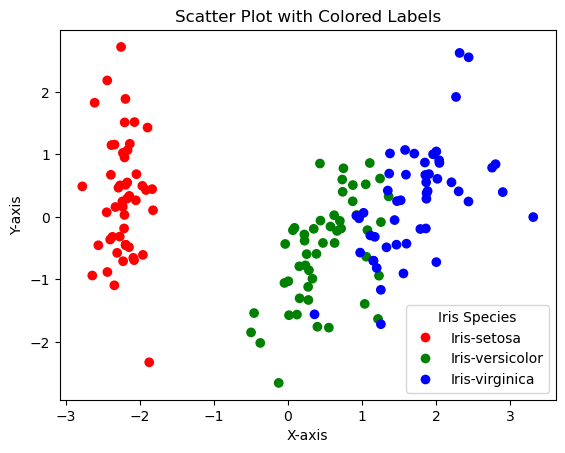

In [55]:
# 4b) Project the 4D standardized data onto 2 dimensions using PCA. Visualize the scatterplot of the first two principal components of the data

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

label_colors = {
    "Iris-setosa": "r",
    "Iris-versicolor": "g",
    "Iris-virginica": "b"
}

# mark points on map depending on species type
colors = [label_colors[species] for species in y]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = colors)

# label the species
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label)
    for label, color in label_colors.items()
]
plt.legend(handles = legend_handles, title = "Iris Species", loc = "best")

# Show plot
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot with Colored Labels")

In [84]:
# 4c) Cluster the 4d standardized data into 3 clusters using GMM clustering. Score the clustering accuracy with sklearn.metrics.cluster.adjusted_rand_score()

from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score

gm = GaussianMixture(n_components = 3).fit(X_standardized)

pred = gm.predict(X_standardized)
accuracy = adjusted_rand_score(y, pred)
print(f"The clustering accuracy of the GMM is {accuracy}")

The clustering accuracy of the GMM is 0.9038742317748124


In [85]:
# 4d) Cluster the 4d standardized data into 3 clusters using K-means clustering

from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3).fit(X_standardized)

pred = km.labels_
accuracy = adjusted_rand_score(y, pred)
print(f"The clustering accuracy of the K-Means is {accuracy}")

The clustering accuracy of the K-Means is 0.5923326221845838


4e) Briefly compare the result from part (c) and part (d). Explain why Gaussian Mixture algorithm performs better than k-Means algorithm

Looking through parts c and d, we can notice that the Gaussian Mixture algorithm performs significantly better at clustering our 4 dimensional standardized data into 3 clusters, achieving a ~90.39% accuracy in predicting labels correctly only through clusters. On the other hand, the K-Means algorithm performs significantly worse, only achieving an accuracy of ~59.23% with the same 3 clusters. For this question specifically, the Gaussian Mixture model likely performed better because GMM doesn't assume spherical clusters, and even when the data is standardized, still has a potentially better approach to identifying certain cluster shapes that might not be spherical. On the other hand, K-means struggles with this, as it tries to find shapes that where points are a standard distance away from a centroid. Additionally, it can be noticed that even in the scatter plot with PCA, there are still species that overlap with the Iris-versicolor and the Iris-virginica species, which may may make a K-means algorithm less effective.
